In [1]:
from sklearn.neighbors import NearestNeighbors
import sklearn.datasets

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from plotnine import *

In [2]:
n_samples = 1500
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0])
dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0])

dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0])

dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0])

dataset5= pd.read_csv("data/dataset5.csv")
dataset6= pd.read_csv("data/dataset6.csv")
dataset7= pd.read_csv("data/dataset7.csv")
dataset8= pd.read_csv("data/dataset8.csv")
dataset9= pd.read_csv("data/dataset9.csv")
datasets=[dataset1]
z = StandardScaler()

1) plot all dataset
2) use standard scalar
3) use K-means, agglomerative, dbscan
4) plot dataset after clustering
5) Evaluate inertia,silhouette score,..........

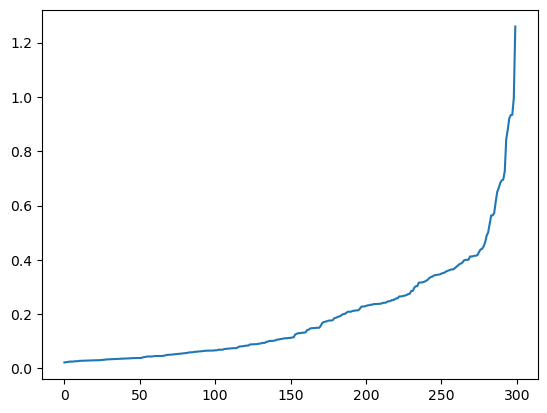

In [3]:
mins = 3
nn = NearestNeighbors(n_neighbors=4)

nn.fit(dataset9[["x", "y"]])

distances, neighbors = nn.kneighbors(dataset9[["x", "y"]])

distances = np.sort(distances[:, mins], axis = 0)
X=list(range(0,len(distances)))
plt.plot(X,distances)
plt.show()

In [4]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.mixture import GaussianMixture

# Plot All Data:

In [5]:
def plot_scatter(X, color):
    plt.scatter(x=X['x'], y=X['y'], color=color)

In [6]:
def print_inertia(x):
    print('Inertia Score = ', x)

In [7]:
def print_silhouette(x):
    print('Silhouette Score = ', x)

## KMeans Function:

In [8]:
def kmean_function(X, n):
    filtered_labels_dict = {}
    filtered_label = []
    kmeans = KMeans(n_clusters=n, random_state=0)
    label = kmeans.fit_predict(X)
    colors = ['red', 'blue', 'yellow', 'green']
    for i in range(n):
        filtered_labels_dict[colors[i]] = X[label == i]
    for key, value in filtered_labels_dict.items():
        plot_scatter(value, key)
    plt.show()
    x = kmeans.fit(X).inertia_
    y = metrics.silhouette_score(X, label, metric='euclidean')
    print_inertia(x)
    print_silhouette(y)

## Agglomerative Clustering Function:

In [9]:
def agglomerative_function(X, n):
    filtered_labels_dict = {}
    filtered_label = []
    clustering = AgglomerativeClustering(n_clusters=n)
    label = clustering.fit_predict(X)
    colors = ['red', 'blue', 'yellow', 'green']
    for i in range(n):
        filtered_labels_dict[colors[i]] = X[label == i]
    for key, value in filtered_labels_dict.items():
        plot_scatter(value, key)
    y = metrics.silhouette_score(X, label, metric='euclidean')
    plt.show()
    print_silhouette(y)

## DBSCAN Function:

In [10]:
def dbscan_function(X, eps, min_samples):
    filtered_labels_dict = {}
    filtered_label = []
    clustering = DBSCAN(eps=eps, min_samples=min_samples)
    label = clustering.fit_predict(X)
    colors = ['red', 'blue', 'yellow', 'green', '#ADFF2F', '#7FFF00', '#7CFC00', '#32CD32','#98FB98','#90EE90',
             '#CD5C5C', '#F08080', '#FA8072', '#E9967A', '#FFA07A', '#FFA07A', '#8FBC8B', '#20B2AA', '#008B8B',
             '#FF6347', '#FFA500', '#FFD700', '#FFEFD5', '#FFE4B5', '#BDB76B', '#F0E68C', '#DDA0DD', '#D8BFD8',
             '#8A2BE2', '#9400D3', '#9932CC', '#8B008B', '#800080', '#4B0082', '#6A5ACD']
    for i in range(label.max() + 1):
        filtered_labels_dict[colors[i]] = X[label == i]
    for key, value in filtered_labels_dict.items():
        plot_scatter(value, key)
    plt.show()
    try:
        y = metrics.silhouette_score(X, label, metric='euclidean')
        print_silhouette(y)
    except ValueError:
        print("Error calculating Silhouette Score")

## GMM Function:

In [11]:
def gmm_function(X, n):
    filtered_labels_dict = {}
    filtered_label = []
    gm = GaussianMixture(n_components=n, random_state=0)
    label = gm.fit_predict(X)
    colors = ['red', 'blue', 'yellow', 'green', '#ADFF2F', '#7FFF00', '#7CFC00', '#32CD32','#98FB98','#90EE90',
             '#CD5C5C', '#F08080', '#FA8072', '#E9967A', '#FFA07A', '#FFA07A', '#8FBC8B', '#20B2AA', '#008B8B',
             '#FF6347', '#FFA500', '#FFD700', '#FFEFD5', '#FFE4B5', '#BDB76B', '#F0E68C', '#DDA0DD', '#D8BFD8',
             '#8A2BE2', '#9400D3', '#9932CC', '#8B008B', '#800080', '#4B0082', '#6A5ACD']
    for i in range(label.max() + 1):
        filtered_labels_dict[colors[i]] = X[label == i]
    for key, value in filtered_labels_dict.items():
        plot_scatter(value, key)
    plt.show()
    try:
        y = metrics.silhouette_score(X, label, metric='euclidean')
        print_silhouette(y)
    except ValueError:
        print("Error calculating Silhouette Score")

# First Dataset:

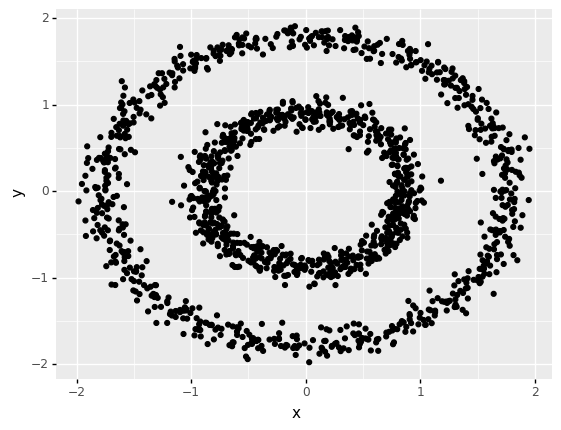

<ggplot: (8765202449872)>

In [12]:
dataset1[["x","y"]] = z.fit_transform(dataset1)
ggplot(dataset1, aes(x = "x", y = "y")) + geom_point()

In [13]:
X = dataset1[['x','y']]

## K-Means:

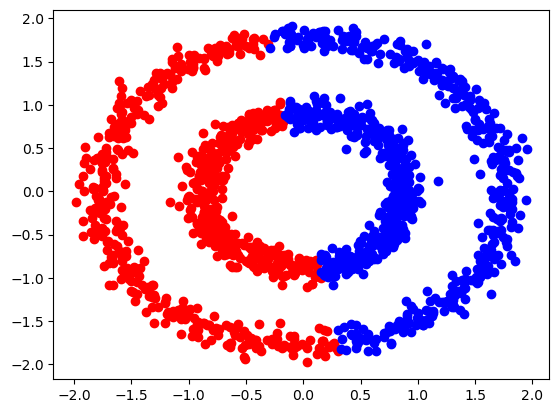

Inertia Score =  1904.2551717623833
Silhouette Score =  0.3533858453583422


In [14]:
kmean_function(X, 2)

## Agglomerative Clustering:

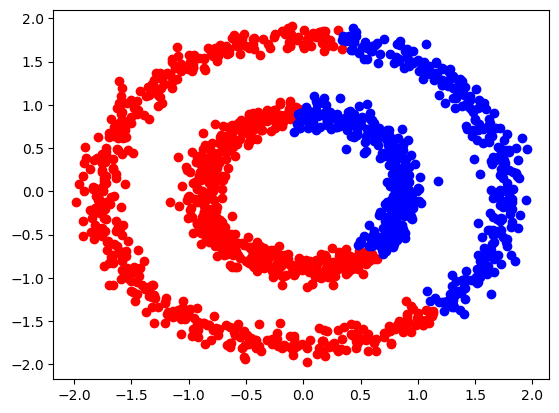

Silhouette Score =  0.32150502751758125


In [15]:
agglomerative_function(X, 2)

## DBSCAN:

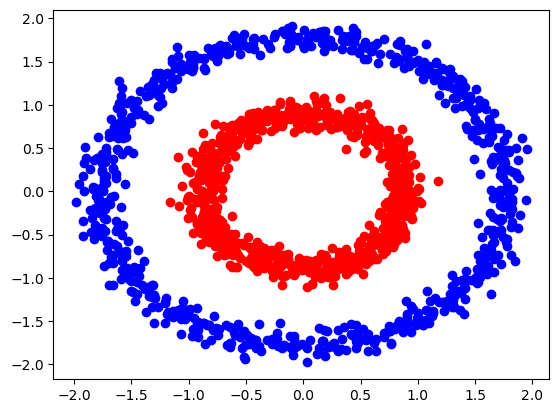

Silhouette Score =  0.11350987685953644


In [16]:
dbscan_function(X, 0.3, 1)

## GMM:

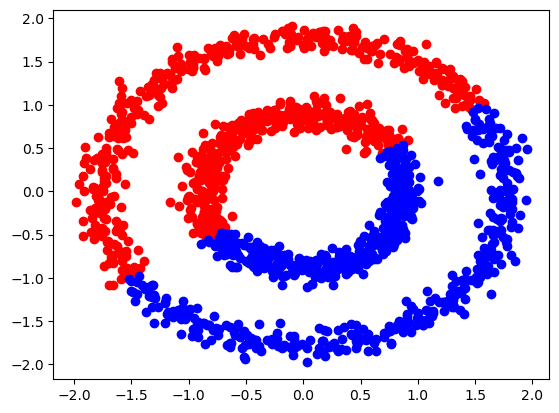

Silhouette Score =  0.35140052895698054


In [17]:
gmm_function(X, 2)

# Second Dataset:

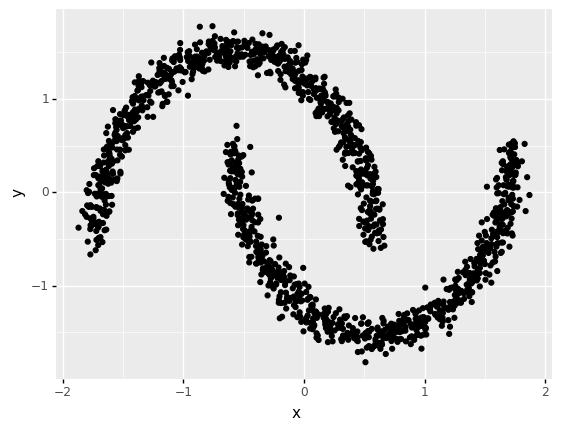

<ggplot: (8765172206562)>

In [18]:
dataset2[["x","y"]] = z.fit_transform(dataset2)
ggplot(dataset2, aes(x = "x", y = "y")) + geom_point()

In [19]:
X = dataset2[['x','y']]

## KMeans:

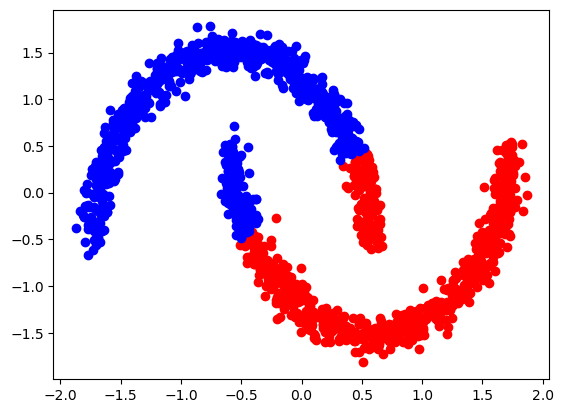

Inertia Score =  1240.4675102886051
Silhouette Score =  0.49946446472293976


In [20]:
kmean_function(X, 2)

## Agglomerative Clustering:

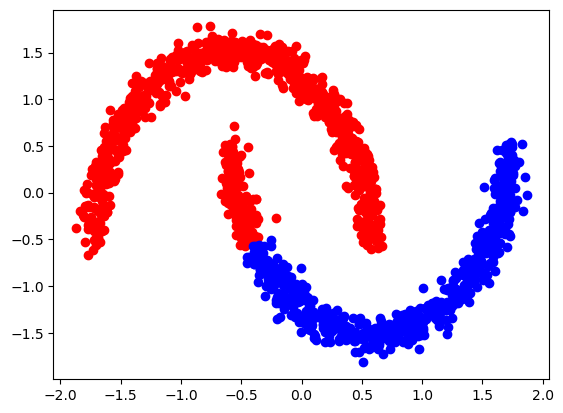

Silhouette Score =  0.46138805009030087


In [21]:
agglomerative_function(X, 2)

## DBSCAN:

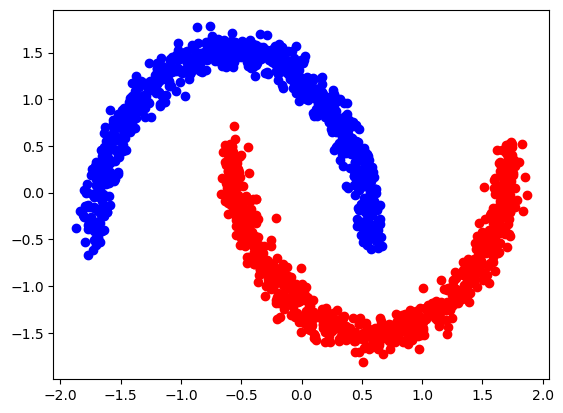

Silhouette Score =  0.39017387646040286


In [22]:
dbscan_function(X, 0.3, 1)

## GMM:

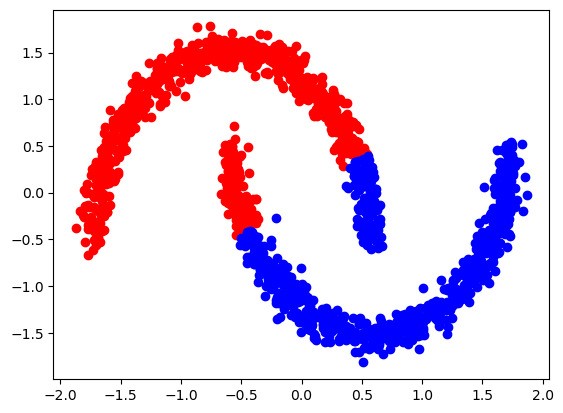

Silhouette Score =  0.4996067736794671


In [23]:
gmm_function(X, 2)

# Third Dataset:

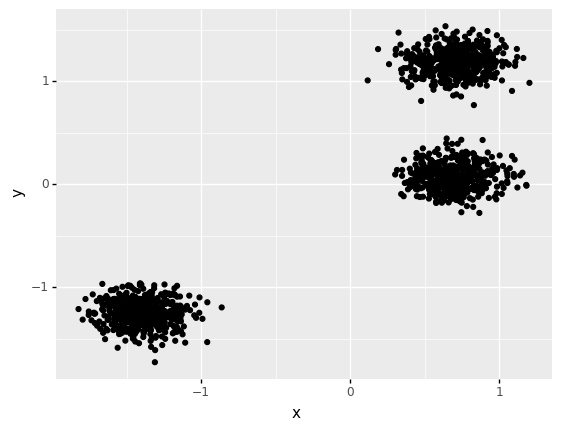

<ggplot: (8765196472396)>

In [24]:
dataset3[["x","y"]] = z.fit_transform(dataset3)
ggplot(dataset3, aes(x = "x", y = "y")) + geom_point()

In [25]:
X = dataset3[['x','y']]

## KMeans:

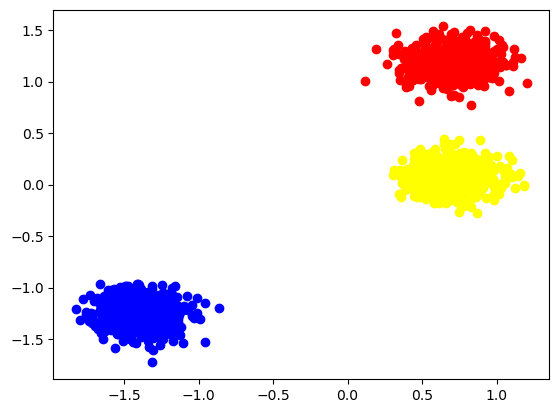

Inertia Score =  63.47684523315103
Silhouette Score =  0.8104321767519068


In [26]:
kmean_function(X, 3)

## Agglomerative Clustering:

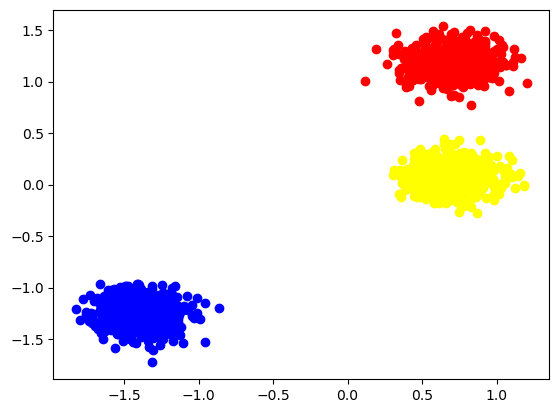

Silhouette Score =  0.8104321767519068


In [27]:
agglomerative_function(X, 3)

## DBSCAN:

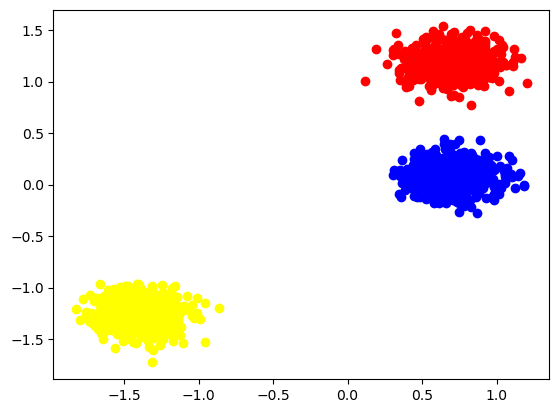

Silhouette Score =  0.8104321767519068


In [28]:
dbscan_function(X, 0.3, 1)

## GMM:

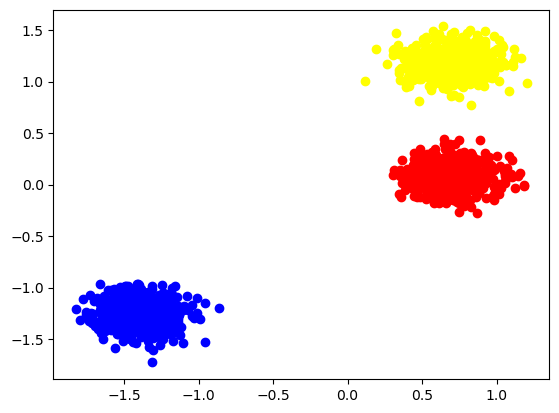

Silhouette Score =  0.8104321767519068


In [29]:
gmm_function(X, 3)

# Fourth Dataset:

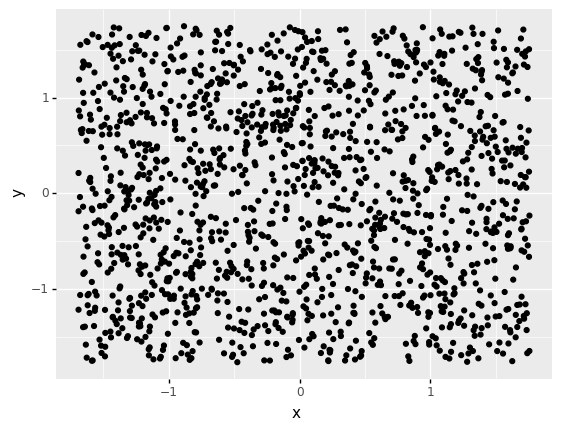

<ggplot: (8765171229495)>

In [30]:
dataset4[["x","y"]] = z.fit_transform(dataset4)
ggplot(dataset4, aes(x = "x", y = "y")) + geom_point()

In [31]:
X = dataset4[['x','y']]

## KMeans:

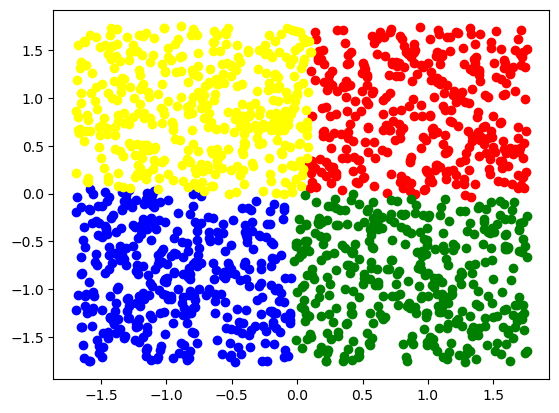

Inertia Score =  749.1079612542459
Silhouette Score =  0.4071037969614081


In [32]:
kmean_function(X, 4)

## Agglomerative Clustering:

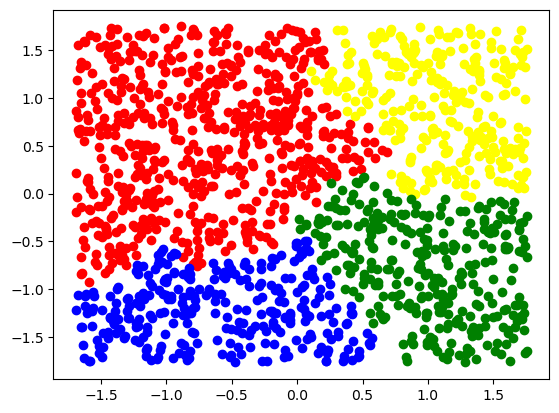

Silhouette Score =  0.35379917771085656


In [33]:
agglomerative_function(X, 4)

## DBSCAN:

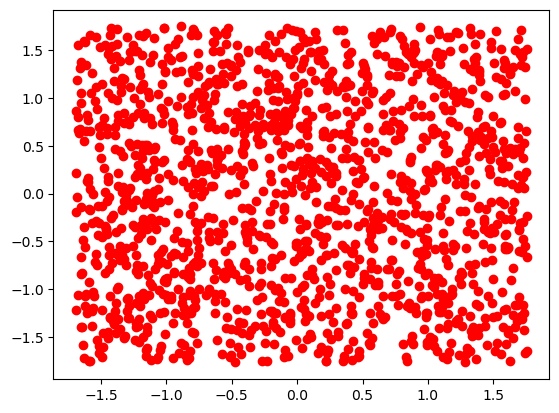

Error calculating Silhouette Score


In [34]:
dbscan_function(X, 0.3, 1)

## GMM:

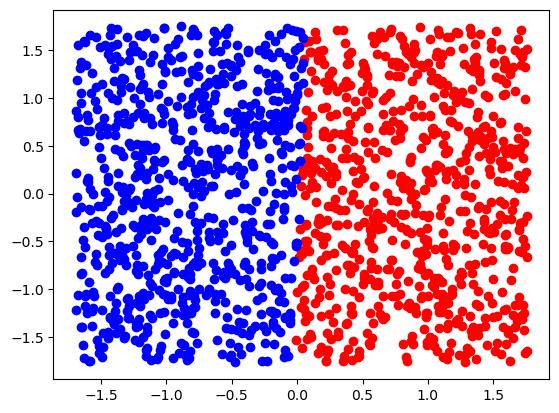

Silhouette Score =  0.3509973274650672


In [35]:
gmm_function(X, 2)

# Fifth Dataset:

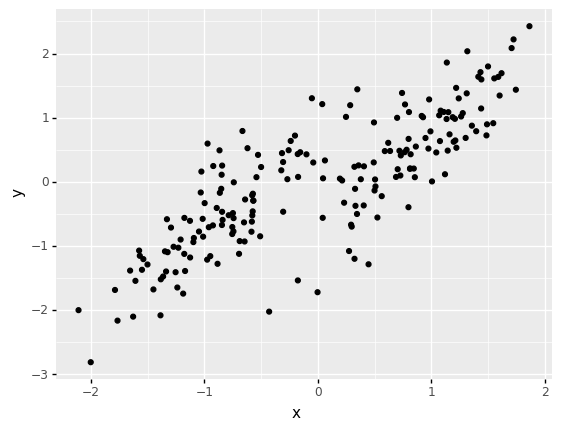

<ggplot: (8765174756943)>

In [36]:
dataset5[["x","y"]] = z.fit_transform(dataset5)
ggplot(dataset5, aes(x = "x", y = "y")) + geom_point()

In [37]:
X = dataset5[['x','y']]

## KMeans:

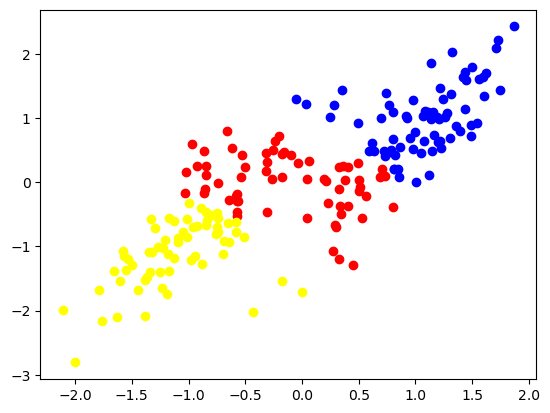

Inertia Score =  88.06585517144586
Silhouette Score =  0.4394937007090191


In [38]:
kmean_function(X, 3)

## Agglomerative Clustering:

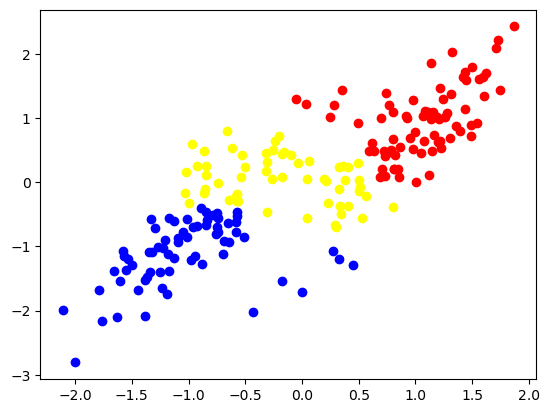

Silhouette Score =  0.43104320032625015


In [39]:
agglomerative_function(X, 3)

## DBSCAN:

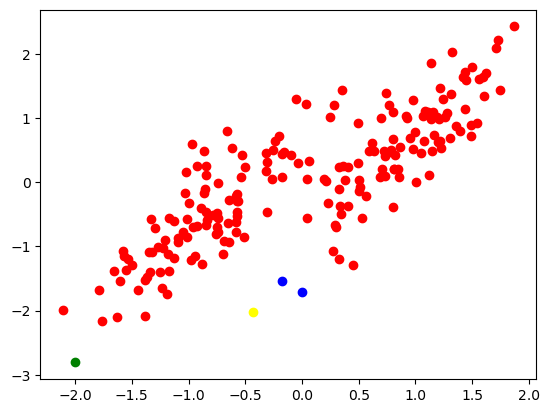

Silhouette Score =  0.09023665238569611


In [40]:
dbscan_function(X, 0.4, 1)

## GMM:

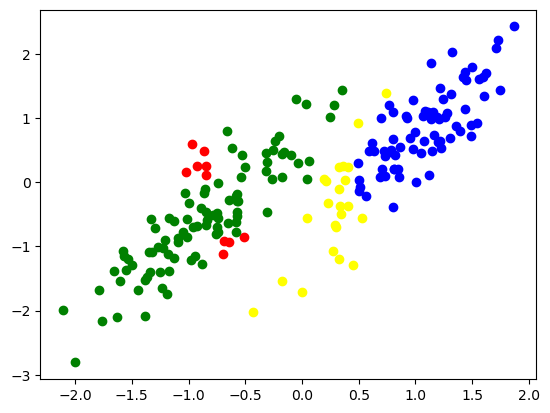

Silhouette Score =  0.15295274569930853


In [41]:
gmm_function(X, 4)

# Sixth Dataset:

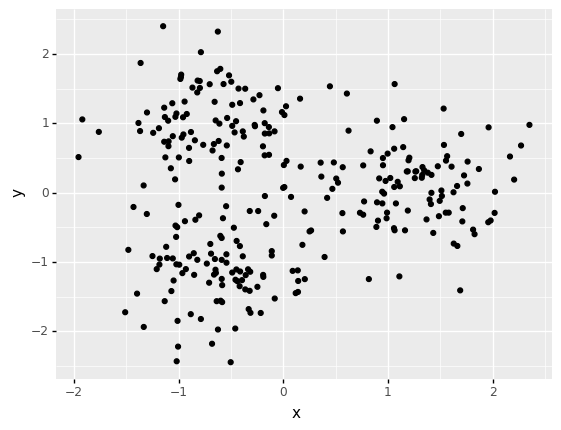

<ggplot: (8765172208812)>

In [42]:
dataset6[["x","y"]] = z.fit_transform(dataset6)
ggplot(dataset6, aes(x = "x", y = "y")) + geom_point()

In [43]:
X = dataset6[['x','y']]

## KMeans:

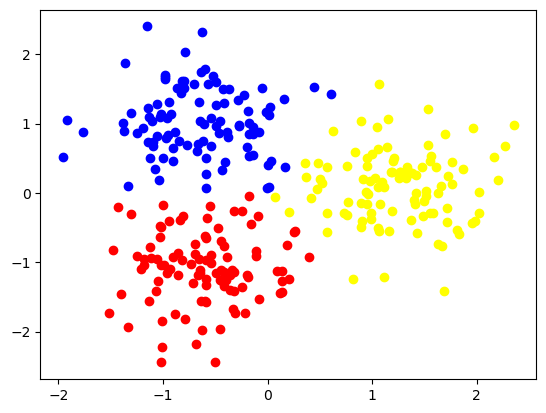

Inertia Score =  140.12813794387978
Silhouette Score =  0.55955877574645


In [44]:
kmean_function(X, 3)

## Agglomerative Clustering:

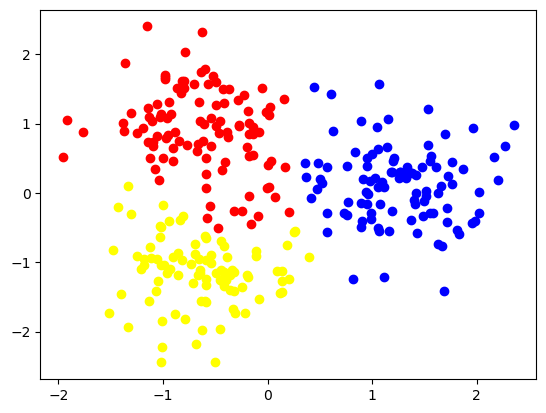

Silhouette Score =  0.5341877492082031


In [45]:
agglomerative_function(X, 3)

## DBSCAN:

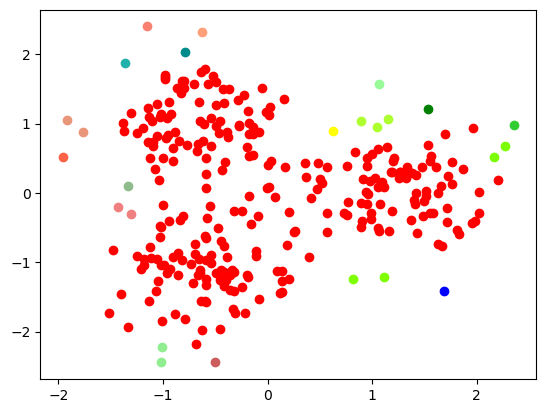

Silhouette Score =  -0.43411167335939255


In [46]:
dbscan_function(X, 0.3, 1)

## GMM:

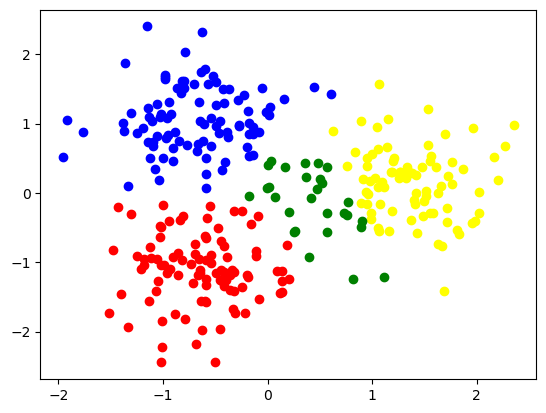

Silhouette Score =  0.42800680496597265


In [47]:
gmm_function(X, 4)

# Seventh Dataset:

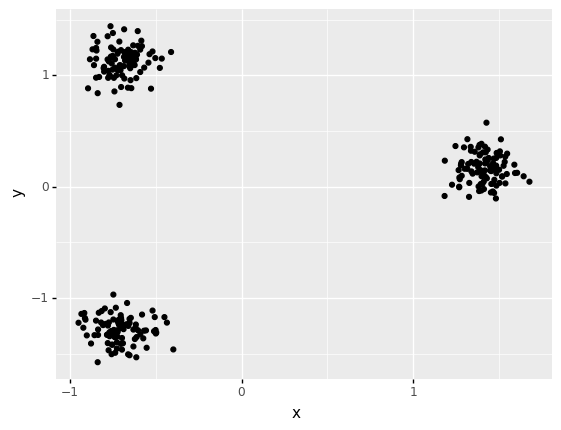

<ggplot: (8765171637520)>

In [48]:
dataset7[["x","y"]] = z.fit_transform(dataset7)
ggplot(dataset7, aes(x = "x", y = "y")) + geom_point()

In [49]:
X = dataset7[['x','y']]

## KMeans:

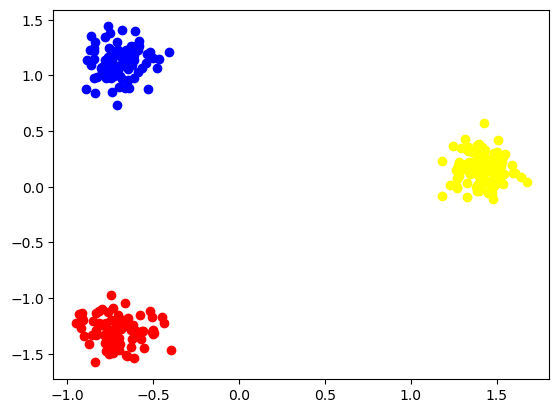

Inertia Score =  7.77312748752676
Silhouette Score =  0.9135359273104274


In [50]:
kmean_function(X, 3)

## Agglomerative Clustering:

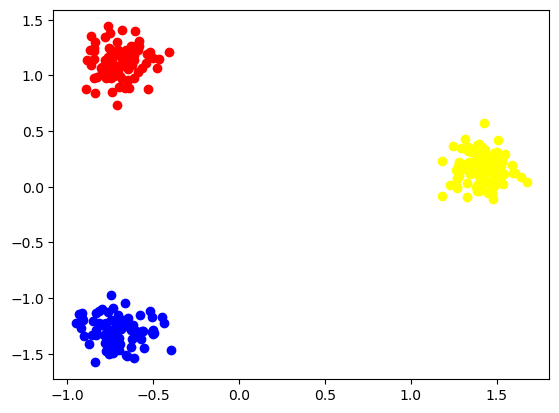

Silhouette Score =  0.9135359273104274


In [51]:
agglomerative_function(X, 3)

## DBSCAN:

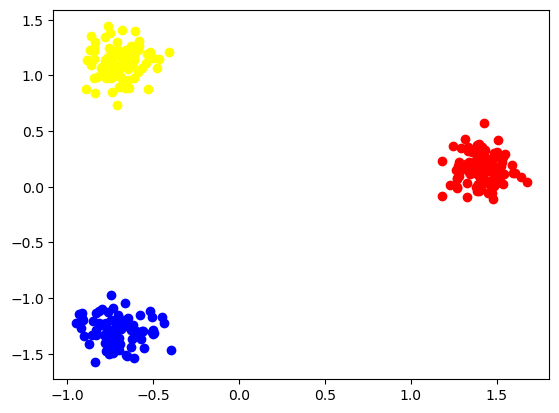

Silhouette Score =  0.9135359273104274


In [52]:
dbscan_function(X, 0.3, 1)

## GMM:

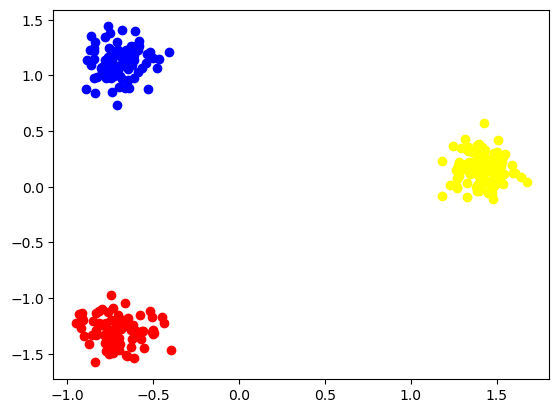

Silhouette Score =  0.9135359273104274


In [53]:
gmm_function(X, 3)

# Eighth Dataset:

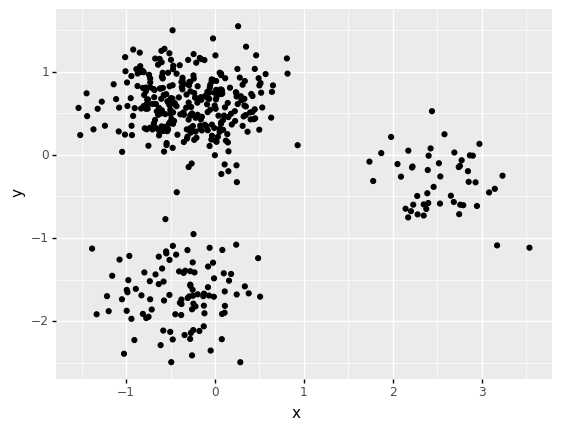

<ggplot: (8765202581562)>

In [54]:
dataset8[["x","y"]] = z.fit_transform(dataset8)
ggplot(dataset8, aes(x = "x", y = "y")) + geom_point()

In [55]:
X = dataset8[['x','y']]

## KMeans:

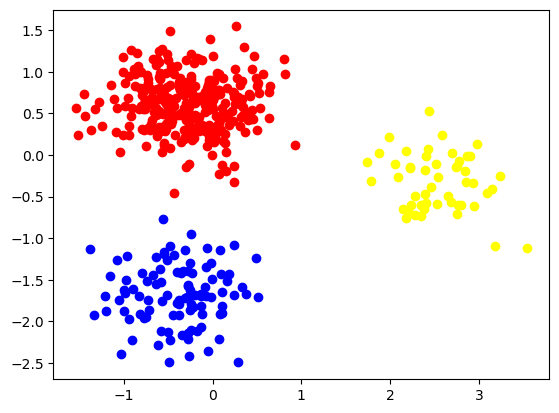

Inertia Score =  138.39982331207204
Silhouette Score =  0.7043537508086658


In [56]:
kmean_function(X, 3)

## Agglomerative Clustering:

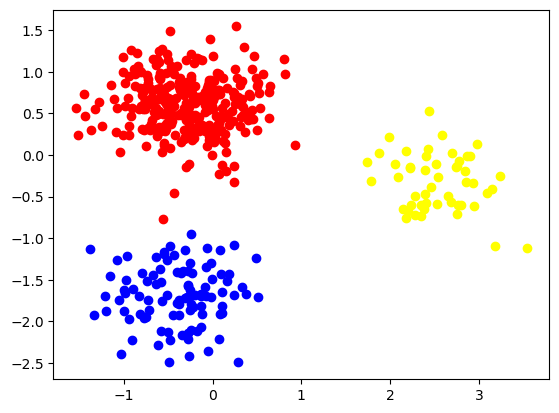

Silhouette Score =  0.7031189213721805


In [57]:
agglomerative_function(X, 3)

## DBSCAN:

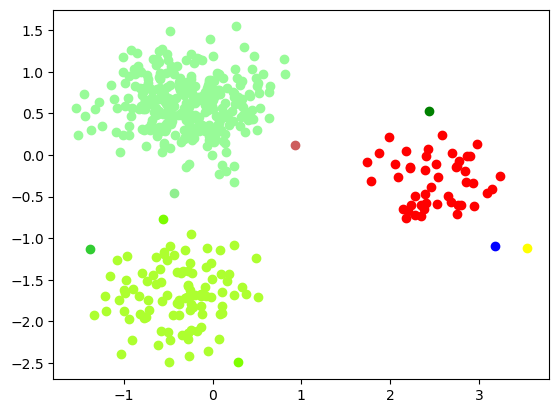

Silhouette Score =  0.23490706544942566


In [58]:
dbscan_function(X, 0.3, 1)

## GMM:

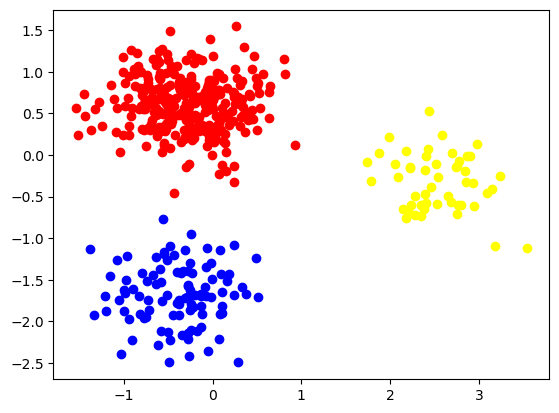

Silhouette Score =  0.7043537508086658


In [59]:
gmm_function(X, 3)

# Ninth Dataset:

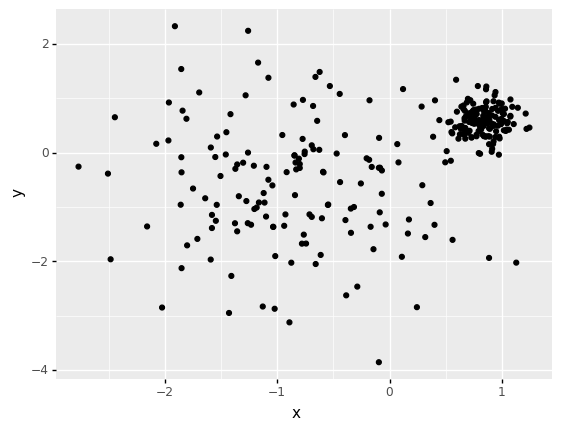

<ggplot: (8765170935345)>

In [60]:
dataset9[["x","y"]] = z.fit_transform(dataset9)
ggplot(dataset9, aes(x = "x", y = "y")) + geom_point()

In [61]:
X = dataset9[['x','y']]

## KMeans:

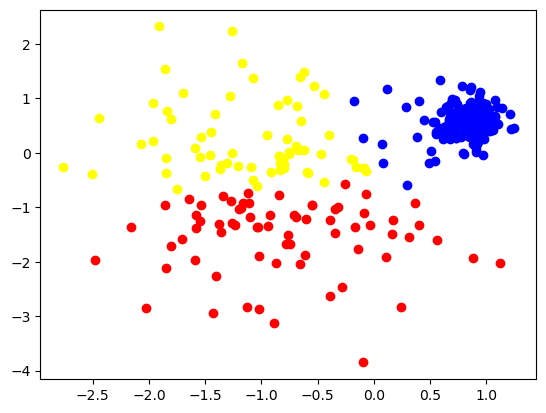

Inertia Score =  147.40965376394365
Silhouette Score =  0.5861497443577426


In [62]:
kmean_function(X, 3)

## Agglomerative Clustering:

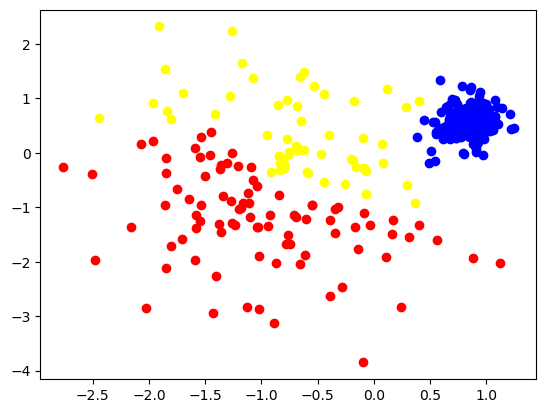

Silhouette Score =  0.5228726587928137


In [63]:
agglomerative_function(X, 3)

## DBSCAN:

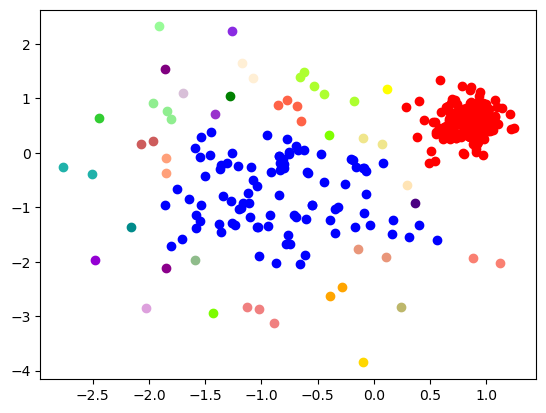

Silhouette Score =  0.2084782142278869


In [64]:
dbscan_function(X, 0.3, 1)

## GMM:

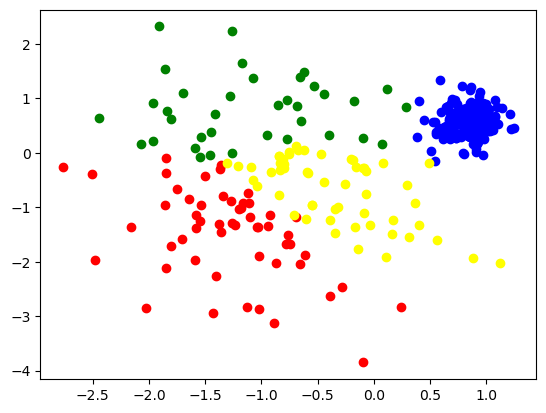

Silhouette Score =  0.5321904688842765


In [65]:
gmm_function(X, 4)